# 서울시 공유자전거 '따릉이' 수요 예측 프로젝트
## 단계1. 데이터 전처리

## 0.프로젝트 소개

### (1) 수행 목표 
여러분은 서울시 정책 연구원으로써 서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

#### 우리가 풀어야 하는 문제는 무엇인가요?

 - 기상상황이 따릉이 수요에 주는 영향을 분석해봅시다.

    * 1.데이터를 탐색하며 정보 획득
        * 날씨 데이터와 서울시 공유 자전거 따릉이의 수요 데이터를 제공해드렸습니다. 
        * 우리는 따릉이의 수요와 날씨간 어떤 연관성이 있는지 탐색 해 봅시다.
    * 2.EDA
        * 주어진 데이터의 변수들을 분석해 봅시다. 


### (2) 데이터 소개

#### 1) 기본 데이터

        * 학습데이터 : sbikedata.csv

#### 2) 데이터셋의 변수 소개

        * date : 날짜
        * hour : 시간
        * temperature : 온도
        * precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
        * windspeed : 풍속(평균)
        * humidity : 습도
        * visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
        * ozone : 오존 수치
        * PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
        * PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
        * count : 시간에 따른 따릉이 대여 수


## 1.환경설정

* 세부 요구사항
    - 경로 설정 
        * 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정 및 라이브러리 로딩
* 이번 프로젝트는 로컬환경에서 진행합니다.

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [1]:
# path = 'C:/Users/User/'

#### 2) 라이브러리 로딩

In [2]:
import pandas as pd                                    # 데이터 조작과 분석을 위한 라이브러리
import numpy as np                                     # 다차원 배열과 행렬을 다루는 라이브러리
import matplotlib.pyplot as plt                        # 데이터 시각화를 위한 라이브러리(선 그래프, 히스토그램, 산점도 등)
import seaborn as sns                                  # Matplotlib을 기반으로 한 데이터 시각화 라이브러리(아름다운 테마 제공)

from statsmodels.graphics.mosaicplot import mosaic     # 모자이크 플롯을 생성하기 위한 함수
from scipy import stats as spst                        # 과학, 공학에서 자주 사용되는 통계 라이브러리 (통계 테스트, 확률 분포, 샘플링)
import statsmodels.api as sm                           # 통계 분석 및 모델링을 위한 라이브러리 (회귀 분석, 시계열 분석, 비모수 통계)
import joblib                                          # 병렬 처리 지원 라이브러리

# 더 필요한 라이브러리를 아래에 추가합니다.

# 한글 폰트 설정
import matplotlib.font_manager as fm

font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'Malgun Gothic'

### (2) 데이터 불러오기
* 주어진 데이터셋
    * 따릉이 수요 및 날씨 데이터 : sbikedata.csv

#### 1) 데이터로딩

In [3]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data_path = 'df.csv'
df = pd.read_csv(data_path)

#### 2) 기본 정보 조회
- 데이터를 head, tail. describe, info 등을 활용하여 확인하세요.

In [4]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print("데이터의 처음 5개 행: ")
print("df.head")

데이터의 처음 5개 행: 
df.head


In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print("\n데이터의 마지막 5개 행: ")
print(df.tail())


데이터의 마지막 5개 행: 
            date  hour  PM10  PM2.5  ozone  temperature  precipitation  \
5822  2021-11-29    20  74.0   58.0  0.002          9.3              0   
5823  2021-11-29    21  65.0   56.0  0.002          8.4              0   
5824  2021-11-29    22  51.0   41.0  0.002          8.6              0   
5825  2021-11-29    23  43.0   35.0  0.001          8.2              0   
5826  2021-11-30     0  39.0   31.0  0.004          7.9              0   

      windspeed  humidity  visibility  count  
5822        0.3        66        1193    273  
5823        2.0        70        1233    228  
5824        1.9        70        1250    215  
5825        2.1        71        1262    125  
5826        2.3        71        1483     95  


In [6]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print("\n데이터의 기술 통계: ")
print(df.describe())


데이터의 기술 통계: 
              hour         PM10        PM2.5        ozone  temperature  \
count  5827.000000  5725.000000  5732.000000  5699.000000  5827.000000   
mean     11.506607    31.970655    15.666609     0.031811    19.376798   
std       6.921963    42.987292    13.850990     0.018277     7.501572   
min       0.000000     3.000000     1.000000     0.001000    -3.500000   
25%       6.000000    16.000000     7.000000     0.019000    14.100000   
50%      12.000000    25.000000    13.000000     0.031000    20.400000   
75%      18.000000    37.000000    20.000000     0.041000    24.900000   
max      23.000000   827.000000   125.000000     0.137000    36.300000   

       precipitation    windspeed     humidity   visibility        count  
count    5827.000000  5827.000000  5827.000000  5827.000000  5827.000000  
mean        0.075511     2.237601    68.608718  1758.438648   215.117899  
std         0.264236     1.054516    17.277266   490.969394   185.972900  
min         0.00000

In [7]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print("\n데이터 정보: ")
print(df.info())


데이터 정보: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5827 non-null   object 
 1   hour           5827 non-null   int64  
 2   PM10           5725 non-null   float64
 3   PM2.5          5732 non-null   float64
 4   ozone          5699 non-null   float64
 5   temperature    5827 non-null   float64
 6   precipitation  5827 non-null   int64  
 7   windspeed      5827 non-null   float64
 8   humidity       5827 non-null   int64  
 9   visibility     5827 non-null   int64  
 10  count          5827 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 500.9+ KB
None


## 2.EDA 1단계 - 데이터 기본 탐색

* 단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

    * <span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

        1. 변수가 내포하고 있는 의미
        2. 변수가 수치형인지, 범주형인지
        3. 결측치 존재 여부 및 조치 방안
        4. 기초 통계량 확인
        5. 데이터 분포 확인
        6. 위 정보로부터 파악한 내용 정리
        7. 추가 분석사항 도출

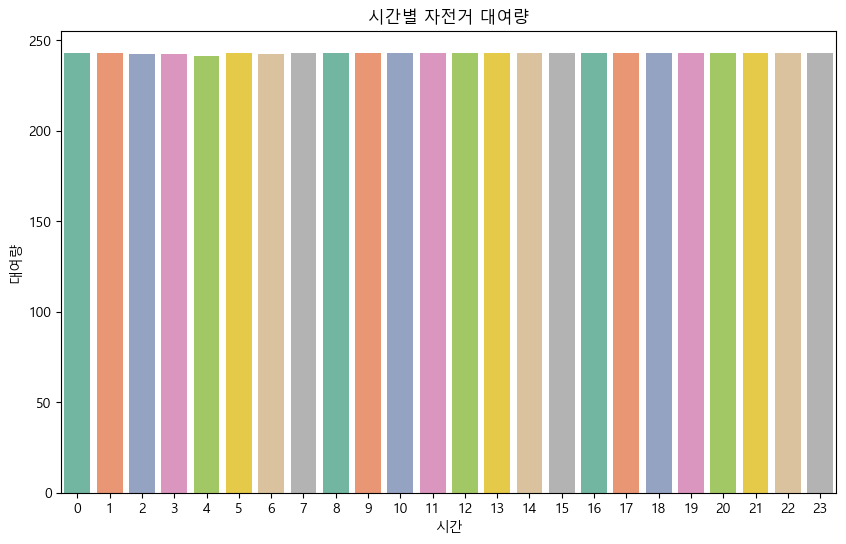

In [8]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 시간별 자전거 대여량 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='hour', palette='Set2')
plt.title('시간별 자전거 대여량')
plt.xlabel('시간')
plt.ylabel('대여량')
plt.show()

변수가 내포하고 있는 의미
- 시간을 24시로 표현

변수가 수치형인지 범주형인지
- 시간은 범주형? 수치형?

In [58]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 시간 변수(hour)의 유니크 값 확인
print("시간 변수(hour)의 유니크한 값 확인:")
print(df['hour'].unique())

# 시간 변수(hour)의 데이터 타입 확인
print("\n시간 변수(hour)의 데이터 타입 확인:")
print(df['hour'].dtype)

# 시간 변수(hour)의 카테고리 수 확인
print("\n시간 변수(hour)의 카테고리 수 확인:")
print(df['hour'].nunique())

시간 변수(hour)의 유니크한 값 확인:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23  0]

시간 변수(hour)의 데이터 타입 확인:
int64

시간 변수(hour)의 카테고리 수 확인:
24


변수의 결측치 존재 여부 및 조치방안

In [10]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 변수의 결측치 존재 여부 확인
missing_values = df.isnull().sum()
print("변수의 결측치 존재 여부:")
print('missing_values')

# 결측치가 존재할 경우 대응 방안
if missing_values.any():
    print("\n결측치가 존재합니다. 대응 방안:")
    # 평균값을 사용하여 대체하는 경우
    mean_temperature = df['temperature'].mean()
    df['temperature'].fillna(mean_temperature, inplace=True)
else:
    print("\n결측치가 존재하지 않습니다.")

변수의 결측치 존재 여부:
missing_values

결측치가 존재합니다. 대응 방안:


변수의 기초 통계량 확인

In [11]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 변수의 기초 통계량 확인
basic_statistics = df.describe()
print("변수의 기초 통계량")
print(basic_statistics)

변수의 기초 통계량
              hour         PM10        PM2.5        ozone  temperature  \
count  5827.000000  5725.000000  5732.000000  5699.000000  5827.000000   
mean     11.506607    31.970655    15.666609     0.031811    19.376798   
std       6.921963    42.987292    13.850990     0.018277     7.501572   
min       0.000000     3.000000     1.000000     0.001000    -3.500000   
25%       6.000000    16.000000     7.000000     0.019000    14.100000   
50%      12.000000    25.000000    13.000000     0.031000    20.400000   
75%      18.000000    37.000000    20.000000     0.041000    24.900000   
max      23.000000   827.000000   125.000000     0.137000    36.300000   

       precipitation    windspeed     humidity   visibility        count  
count    5827.000000  5827.000000  5827.000000  5827.000000  5827.000000  
mean        0.075511     2.237601    68.608718  1758.438648   215.117899  
std         0.264236     1.054516    17.277266   490.969394   185.972900  
min         0.000000  

변수의 분포 확인
* kdeplot 활용

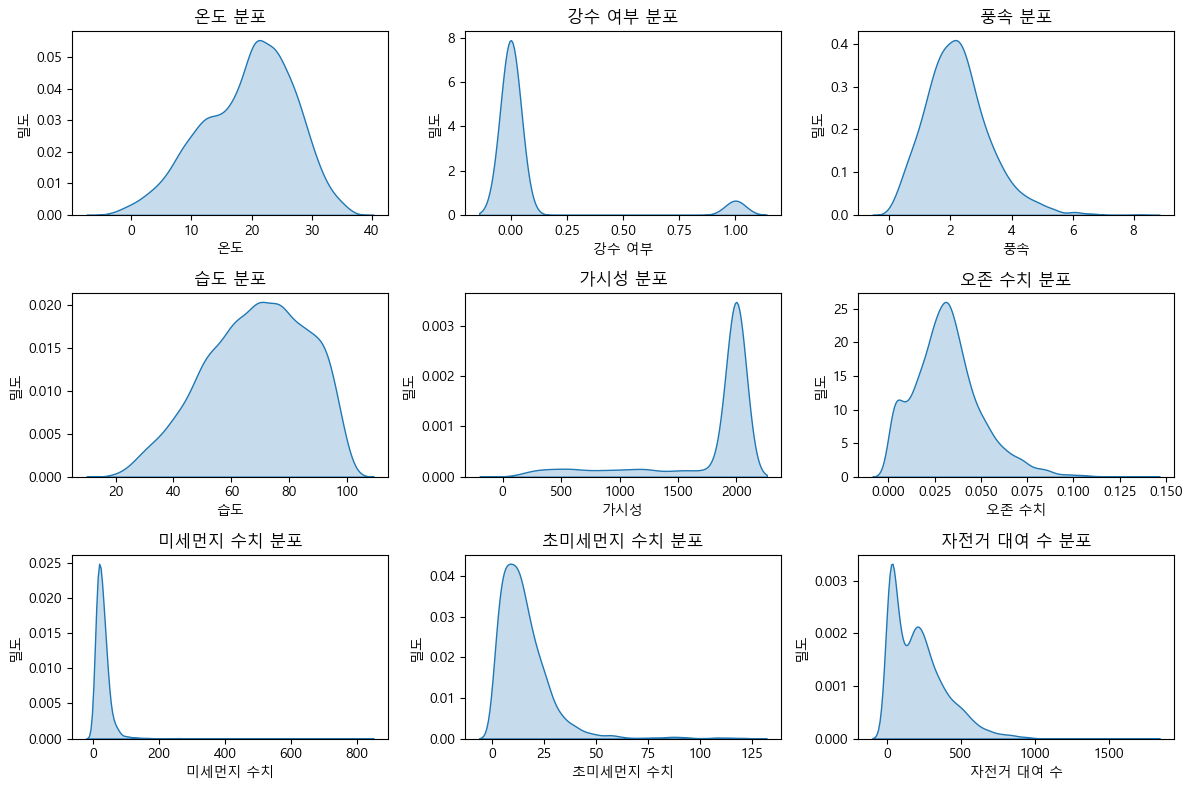

In [12]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 음수 값을 가진 데이터 시각화 경고 제거
import warnings
warnings.filterwarnings("ignore")

# 변수의 분포 확인 (kdeplot 활용)
plt.figure(figsize=(12, 8))

# temperature 변수의 분포
plt.subplot(3, 3, 1)
sns.kdeplot(data=df['temperature'], fill=True)
plt.title('온도 분포')
plt.xlabel('온도')
plt.ylabel('밀도')

# precipitation 변수의 분포
plt.subplot(3, 3, 2)
sns.kdeplot(data=df['precipitation'], fill=True)
plt.title('강수 여부 분포')
plt.xlabel('강수 여부')
plt.ylabel('밀도')

# windspeed 변수의 분포
plt.subplot(3, 3, 3)
sns.kdeplot(data=df['windspeed'], fill=True)
plt.title('풍속 분포')
plt.xlabel('풍속')
plt.ylabel('밀도')

#humidity 변수의 분포
plt.subplot(3, 3, 4)
sns.kdeplot(data=df['humidity'], fill=True)
plt.title('습도 분포')
plt.xlabel('습도')
plt.ylabel('밀도')

# visibility 변수의 분포
plt.subplot(3, 3, 5)
sns.kdeplot(data=df['visibility'], fill=True)
plt.title('가시성 분포')
plt.xlabel('가시성')
plt.ylabel('밀도')

# ozone 변수의 분포
plt.subplot(3, 3, 6)
sns.kdeplot(data=df['ozone'], fill=True)
plt.title('오존 수치 분포')
plt.xlabel('오존 수치')
plt.ylabel('밀도')

# PM10 변수의 분포
plt.subplot(3, 3, 7)
sns.kdeplot(data=df['PM10'], fill=True)
plt.title('미세먼지 수치 분포')
plt.xlabel('미세먼지 수치')
plt.ylabel('밀도')

# PM2.5 변수의 분포
plt.subplot(3, 3, 8)
sns.kdeplot(data=df['PM2.5'], fill=True)
plt.title('초미세먼지 수치 분포')
plt.xlabel('초미세먼지 수치')
plt.ylabel('밀도')

# count 변수의 분포
plt.subplot(3, 3, 9)
sns.kdeplot(data=df['count'], fill=True)
plt.title('자전거 대여 수 분포')
plt.xlabel('자전거 대여 수')
plt.ylabel('밀도')

plt.tight_layout()
plt.show()

위 정보로 부터 파악한 내용 정리
- 데이터의 '시간' 열은 5827개 row로 구성되어있으며 결측치는 없음
- 0시 및 일부 중간시간대 데이터가 비어있음

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 온도


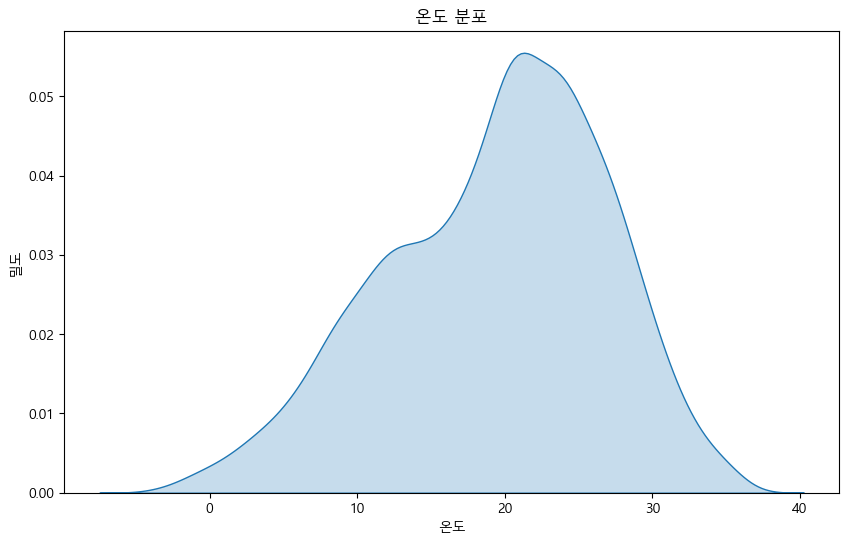

In [13]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 변수의 분포 확인 (kdeplot 활용)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['temperature'], fill=True)
plt.title('온도 분포')
plt.xlabel('온도')
plt.ylabel('밀도')
plt.show()

변수가 수치형인지 범주형인지
- 기온은 수치형? 범주형?

In [14]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 변수의 타입 확인
print(df['temperature'].dtype)

# temperature 변수는 수치형 변수이다. (flot64 = 수치형)
# 수치형 변수는 숫자로 표현되며 연속적인 값을 가지며, 산술적인 연산이 가능

float64


변수의 결측치 존재 여부 및 조치방안

In [15]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 결측치 확인
missing_values = df['temperature'].isnull().sum()

if missing_values > 0:
    print(f"결측치가 {missing_values}개 발견되었습니다.")
    # 평균값으로 대체
    mean_temperature = df['temperature'].mean()
    df['temperature'].fillna(mean_temperature, inplace=True)
    print("평균값으로 결측치를 대체하였습니다.")
else:
    print("결측치가 발견되지 않았습니다.")

결측치가 발견되지 않았습니다.


변수의 기초 통계량 확인

In [16]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 변수의 기초 통계량 확인
temperature_stats = df['temperature'].describe()
print(temperature_stats)

count    5827.000000
mean       19.376798
std         7.501572
min        -3.500000
25%        14.100000
50%        20.400000
75%        24.900000
max        36.300000
Name: temperature, dtype: float64


변수의 분포 확인

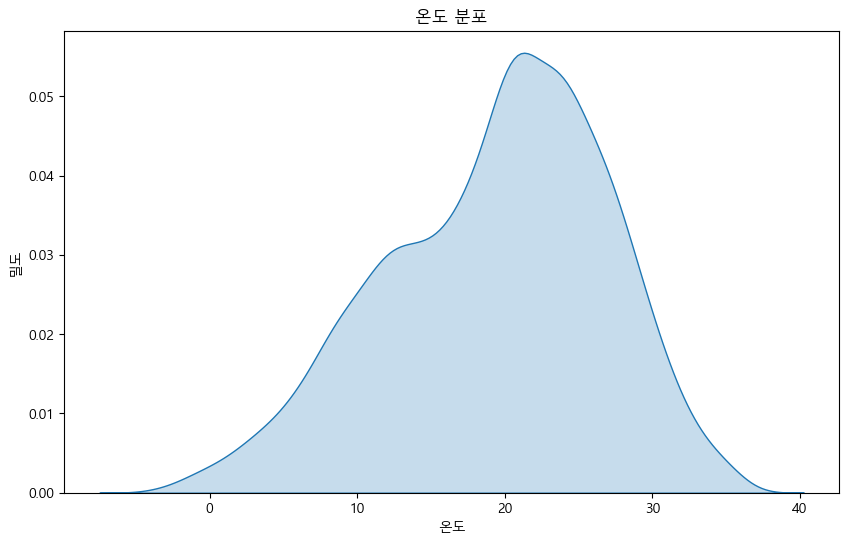

In [17]:
# 변수의 분포 확인 (KDE plot 활용)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['temperature'], fill=True)
plt.title('온도 분포')
plt.xlabel('온도')
plt.ylabel('밀도')
plt.show()

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 강우 여부 (비가 안왔으면 0, 왔으면 1)

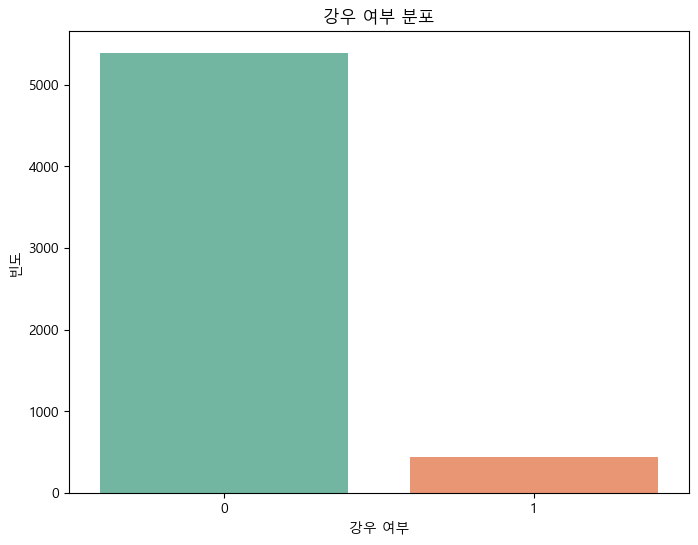

In [18]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 변수의 분포 확인 (countplot 활용)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='precipitation', palette='Set2')
plt.title('강우 여부 분포')
plt.xlabel('강우 여부')
plt.ylabel('빈도')
plt.show()

변수가 수치형인지 범주형인지
- 1시간 전 강우 유무는 범주형? 수치형?

In [19]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 변수의 타입 확인
print(df['precipitation'].dtype)

# precipitation 변수는 정수형 변수이다. (int64 = 정수형)
# 1시간 전 강우 여부는 범주형 변수

int64


변수의 결측치 존재 여부 및 조치 방안


In [20]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 결측치 확인
missing_values = df['precipitation'].isnull().sum()

if missing_values > 0:
    print(f"결측치가 {missing_values}개 발견되었습니다.")
    # 평균값으로 대체
    mean_precipitation = df['precipitation'].mean()
    df['precipitation'].fillna(mean_precipitation, inplace=True)
    print("평균값으로 결측치를 대체하였습니다.")
else:
    print("결측치가 발견되지 않았습니다.")

결측치가 발견되지 않았습니다.


변수의 기초 통계량 확인

In [21]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 변수의 기초 통계량 확인
precipitation_stats = df['precipitation'].describe()
print(precipitation_stats)

count    5827.000000
mean        0.075511
std         0.264236
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: precipitation, dtype: float64


변수의 분포 확인

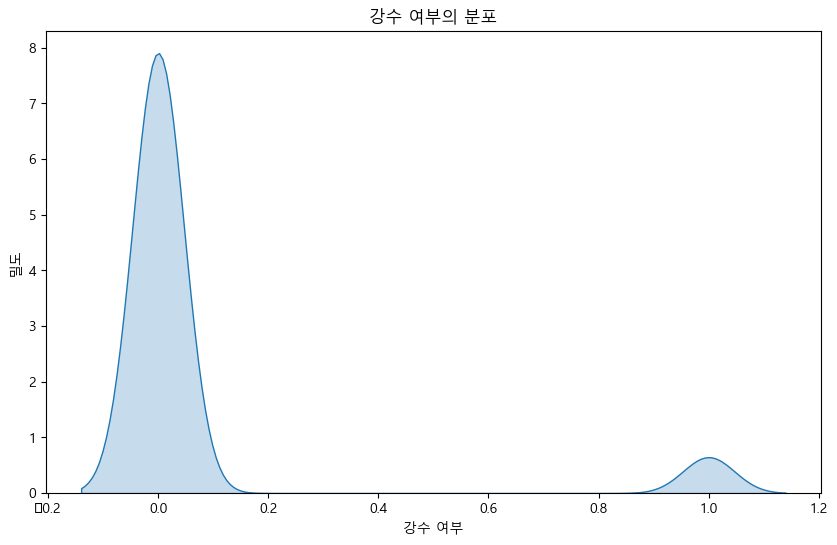

In [22]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 변수의 분포 확인 (KDE plot 활용)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['precipitation'], fill=True)
plt.title('강수 여부의 분포')
plt.xlabel('강수 여부')
plt.ylabel('밀도')
plt.show()

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 풍속, 풍량

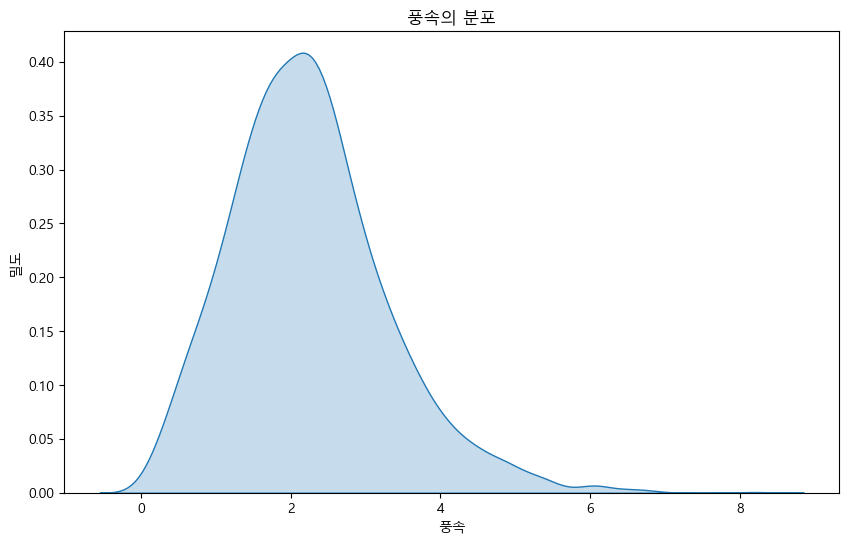

In [23]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 변수의 분포 확인 (kdeplot 활용)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['windspeed'], fill=True)
plt.title('풍속의 분포')
plt.xlabel('풍속')
plt.ylabel('밀도')
plt.show()

변수가 수치형인지 범주형인지


In [24]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 변수의 타입 확인
print(df['windspeed'].dtype)

# windspeed 변수는 수치형 변수이다. (flot64 = 수치형)
# 수치형 변수는 숫자로 표현되며 연속적인 값을 가지며, 산술적인 연산이 가능

float64


변수의 결측치 존재 여부 및 조치방안

In [25]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 결측치 확인
missing_values = df['windspeed'].isnull().sum()

if missing_values > 0:
    print(f"결측치가 {missing_values}개 발견되었습니다.")
# 평균값으로 대체
    mean_windspeed = df['windspeed'].mean()
    df['windspeed'].fillna(mean_windspeed, inplace=True)
    print("평균값으로 결측치를 대체하였습니다.")
else:
    print("결측치가 발견되지 않았습니다.")

결측치가 발견되지 않았습니다.


변수의 기초 통계량 확인

In [26]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 변수의 기초 통계량 확인
windspeed_stats = df['windspeed'].describe()
print(windspeed_stats)

count    5827.000000
mean        2.237601
std         1.054516
min         0.000000
25%         1.500000
50%         2.200000
75%         2.800000
max         8.300000
Name: windspeed, dtype: float64


변수의 분포 확인

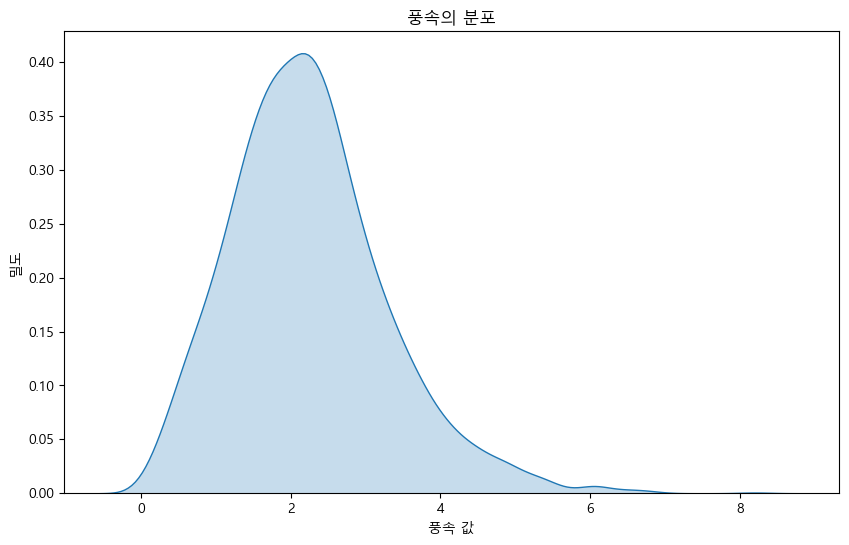

In [27]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 변수의 분포 확인 (KDE plot 활용)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['windspeed'], fill=True)
plt.title('풍속의 분포')
plt.xlabel('풍속 값')
plt.ylabel('밀도')
plt.show()

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 습도

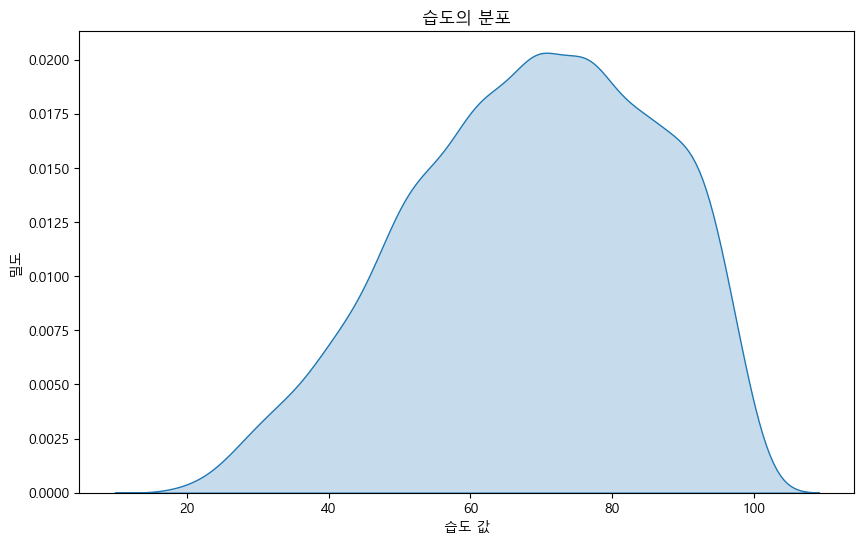

In [28]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 변수의 분포 확인 (KDE plot 활용)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['humidity'], fill=True)
plt.title('습도의 분포')
plt.xlabel('습도 값')
plt.ylabel('밀도')
plt.show()

변수가 수치형인지 범주형인지


In [29]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 변수의 타입 확인
print(df['humidity'].dtype)
# humidity 변수는 정수형 변수이다. (int64 = 정수형)

int64


변수의 결측치 존재 여부 및 조치방안

In [30]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 결측치 확인
missing_values = df['humidity'].isnull().sum()

if missing_values > 0:
    print(f"결측치가 [missing_values]개 발견되었습니다.")
    # 평균값을 사용하여 대체하는 경우
    mean_humidity = df['humidity'].mean()
    df['humidity'].fillna(mean_humidity, inplace=True)
else:
    print("결측치가 발견되지 않았습니다.")

결측치가 발견되지 않았습니다.


변수의 기초 통계량 확인

In [31]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 변수의 기초 통계량 확인
humidity_stats = df['humidity'].describe()
print(humidity_stats)

count    5827.000000
mean       68.608718
std        17.277266
min        19.000000
25%        56.000000
50%        70.000000
75%        82.000000
max       100.000000
Name: humidity, dtype: float64


변수의 분포 확인

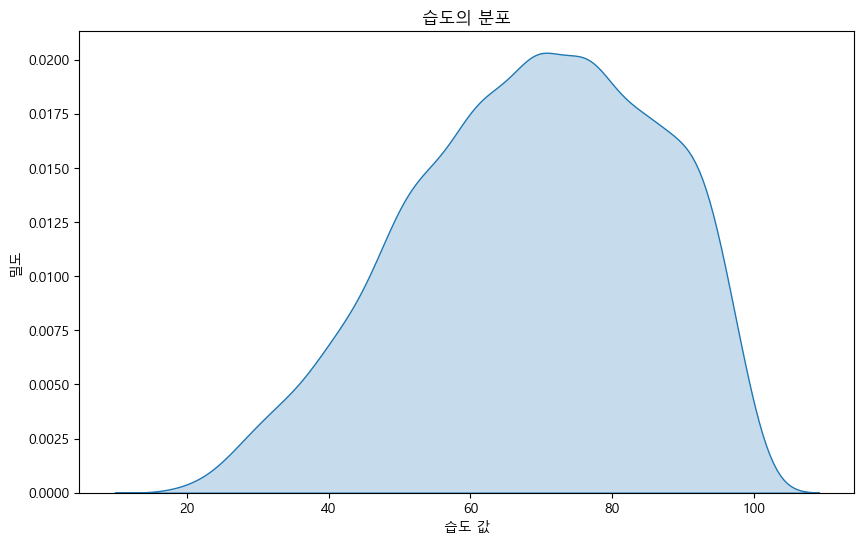

In [32]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 변수의 분포 확인 (KDE plot 활용)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['humidity'], fill=True)
plt.title('습도의 분포')
plt.xlabel('습도 값')
plt.ylabel('밀도')
plt.show()

변수가 내포하고 있는 의미
- 대여 시점의 시계 (시정 거리)

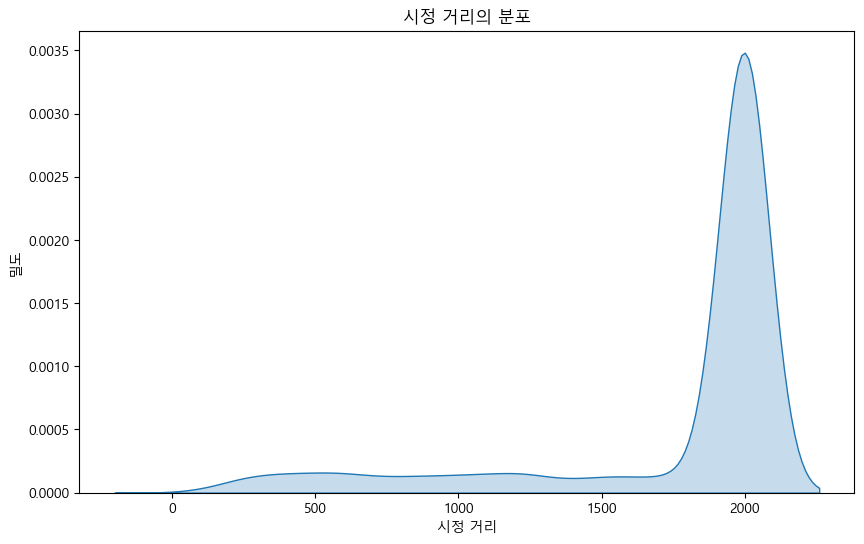

In [33]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 변수의 분포 확인
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['visibility'], fill=True)
plt.title('시정 거리의 분포')
plt.xlabel('시정 거리')
plt.ylabel('밀도')
plt.show()

변수가 수치형인지 범주형인지

In [34]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 변수의 타입 확인
print(df['visibility'].dtype)
# visibility 변수는 정수형 변수이다. (int64 = 정수형)

int64


변수의 결측치 존재 여부 및 조치방안

In [35]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 결측치 확인
missing_values = df['visibility'].isnull().sum()

# 결측치가 있는지 여부에 따라 처리
if missing_values > 0:
    print(f"결측치가 {missing_values}개 발견되었습니다.")
    # 평균값으로 대체하는 경우
    mean_visibility = df['visibility'].mean()
    df['visibility'].fillna(mean_visibility, inplace=True)
    print("결측치를 평균값으로 대체하였습니다.")
else:
    print("결측치가 발견되지 않았습니다.")

결측치가 발견되지 않았습니다.


변수의 기초 통계량 확인

In [36]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 변수의 기초 통계량 확인
visibility_stats = df['visibility'].describe()
print(visibility_stats)

count    5827.000000
mean     1758.438648
std       490.969394
min        60.000000
25%      1935.500000
50%      2000.000000
75%      2000.000000
max      2000.000000
Name: visibility, dtype: float64


변수의 분포 확인

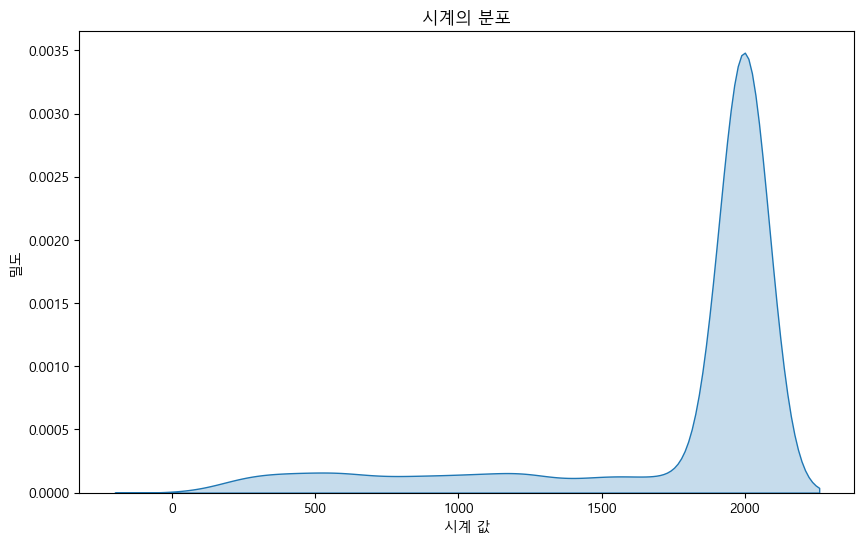

In [37]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 변수의 분포 확인 (KDE plot 활용)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['visibility'], fill=True)
plt.title('시계의 분포')
plt.xlabel('시계 값')
plt.ylabel('밀도')
plt.show()

#### 가설 1 : 여름철 오존 농도에 따라 대여량에는 차이가 있을 것이다.

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 오존 수치

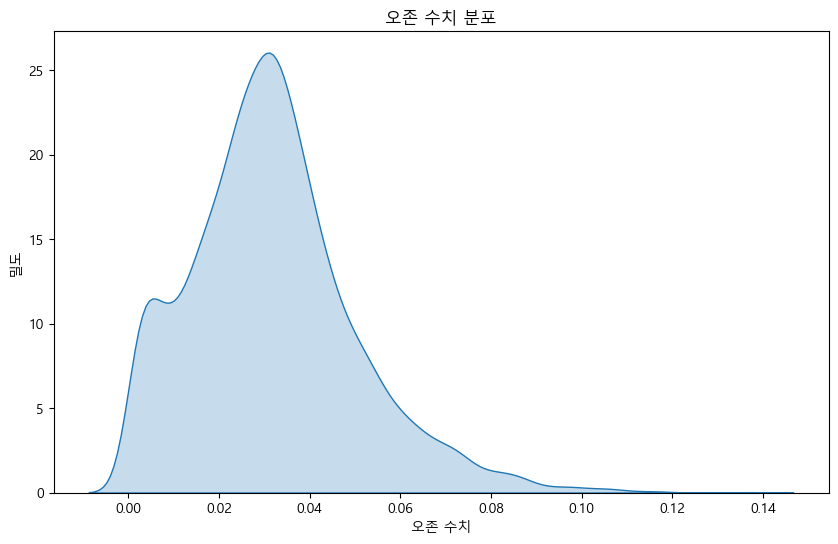

In [38]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 변수의 분포 확인 (KDE plot 활용)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['ozone'], fill=True)
plt.title('오존 수치 분포')
plt.xlabel('오존 수치')
plt.ylabel('밀도')
plt.show()

변수가 수치형인지 범주형인지


In [39]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 변수의 타입 확인
print(df['ozone'].dtype)

# ozone 변수는 수치형 변수이다. (flot64 = 수치형)
# 수치형 변수는 숫자로 표현되며 연속적인 값을 가지며, 산술적인 연산이 가능

float64


변수의 결측치 존재 여부 및 조치방안

In [40]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 결측치 확인
missing_values = df['ozone'].isnull().sum()

if missing_values > 0:
    print(f"결측치가 {missing_values}개 발견되었습니다.")
    # 평균값을 사용하여 대체하는 경우
    mean_ozone = df['ozone'].mean()
    df['ozone'].fillna(mean_ozone, inplace=True)
    print("결측치를 평균값으로 대체하였습니다.")
else:
    print("결측치가 발견되지 않았습니다.")

결측치가 128개 발견되었습니다.
결측치를 평균값으로 대체하였습니다.


만약 결측치가 존재한다면?-> 어떻게 처리할 것인가?

In [41]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 결측치 처리 방법을 결정하여 적용합니다.
if df['ozone'].isnull().sum() > 0:
    # 결측치가 존재할 경우 평균값으로 대체합니다.
    df['ozone'].fillna(df['ozone'].mean(), inplace=True)

변수의 기초 통계량 확인

In [42]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 변수의 기초 통계량 확인
ozone_stats = df['ozone'].describe()
print(ozone_stats)

count    5827.000000
mean        0.031811
std         0.018075
min         0.001000
25%         0.020000
50%         0.031000
75%         0.041000
max         0.137000
Name: ozone, dtype: float64


변수의 분포 확인

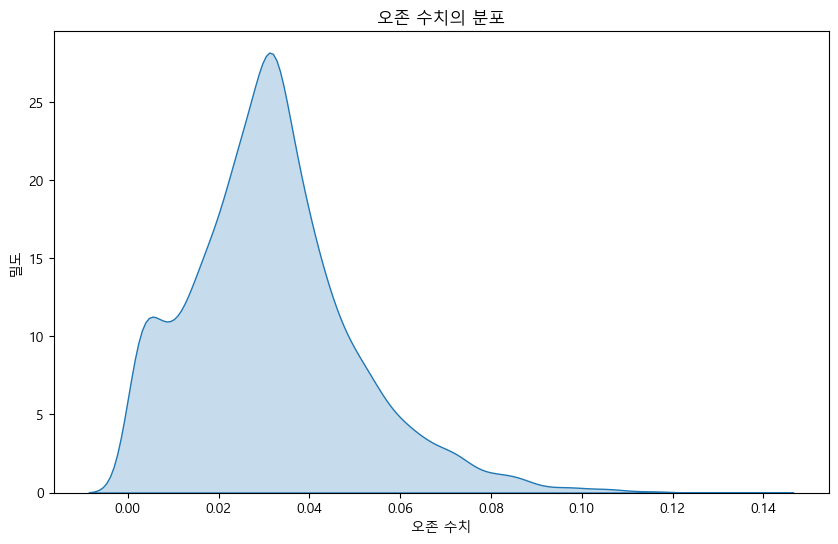

In [43]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 변수의 분포 확인
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['ozone'], fill=True)
plt.title('오존 수치의 분포')
plt.xlabel('오존 수치')
plt.ylabel('밀도')
plt.show()

위 정보로 부터 파악한 내용 정리


* 주어진 데이터에서 오존 수치의 분포를 살펴본 결과, 대부분의 값이 0.05 이하의 수치에 분포되어 있음을 확인할 수 있습니다.

* 그러나 몇몇 이상치 값이 존재하며, 이러한 값들은 분포의 오른쪽 끝에 있습니다.

* 이러한 이상치 값은 데이터의 편향을 초래할 수 있으므로 분석 시 주의가 필요합니다.

변수가 내포하고 있는 의미
- 따릉이의 대여량 -> 우리가 예측해야 할 변수!

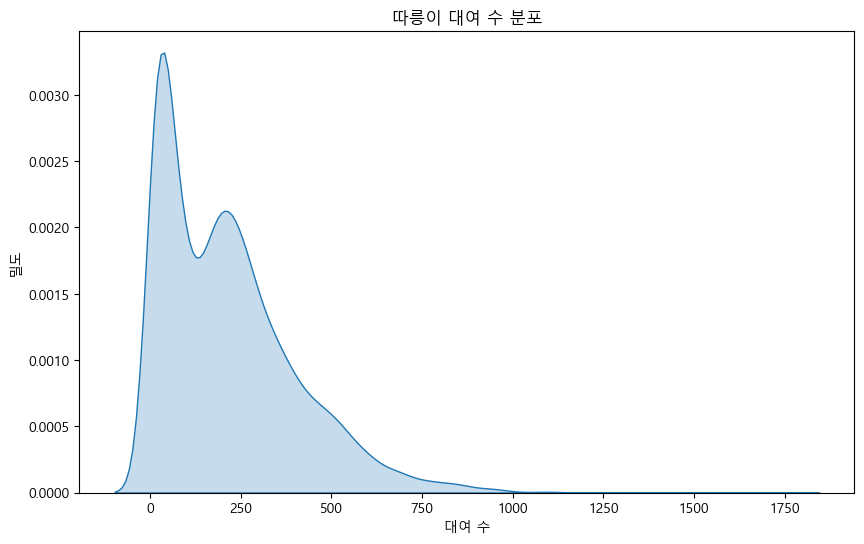

In [54]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 변수의 분포 확인 (KDE plot 활용)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['count'], fill=True)
plt.title("따릉이 대여 수 분포")
plt.xlabel("대여 수")
plt.ylabel("밀도")
plt.show()

변수가 수치형인지 범주형인지


변수의 결측치 존재 여부 및 조치 방안

In [55]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 결측치가 있는 경우 평균으로 대체
if missing_values > 0:
    mean_count = df['count'].mean()
    df['count'].fillna(mean_count, inplace=True)
    print("결측치를 평균값으로 대체하였습니다.")
else:
    print("결측치가 발견되지 않았습니다.")

결측치를 평균값으로 대체하였습니다.


변수의 기초 통계량 확인

In [56]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 변수의 기초 통계량 확인
count_stats = df['count'].describe()
print(count_stats)

count    5827.000000
mean      215.117899
std       185.972900
min         1.000000
25%        53.000000
50%       186.000000
75%       315.000000
max      1746.000000
Name: count, dtype: float64


변수의 분포 확인

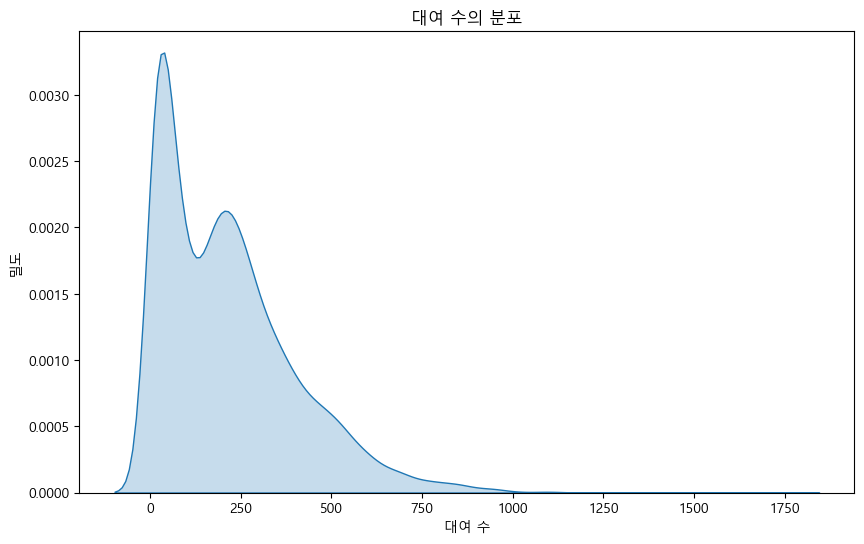

In [57]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 변수의 분포 확인 (KDE plot 활용)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['count'], fill=True)
plt.title('대여 수의 분포')
plt.xlabel('대여 수')
plt.ylabel('밀도')
plt.show()